In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/2 [==============>...............] - ETA: 0s - loss: 1.8443 - accuracy: 0.1406
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 1s 216ms/step - loss: 1.8149 - accuracy: 0.1474 - val_loss: 1.7047 - val_accuracy: 0.1071
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7236 - accuracy: 0.1797
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 43ms/step - loss: 1.7695 - accuracy: 0.1434 - val_loss: 1.6795 - val_accuracy: 0.1071
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7925 - accuracy: 0.1875
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 45ms/step - loss: 1.7793 - accuracy: 0.1514 - val_loss: 1.6583 - val_accuracy: 0.1071
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7043 - accuracy: 0.1484
Epoch 4: 

D:\GodotProjects\tddd57-labs\hand-gesture-recognition-mediapipe\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 44ms/step - loss: 1.7101 - accuracy: 0.1753 - val_loss: 1.6244 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6657 - accuracy: 0.1562
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 43ms/step - loss: 1.6806 - accuracy: 0.1873 - val_loss: 1.6111 - val_accuracy: 0.0000e+00
Epoch 7/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6779 - accuracy: 0.1875
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 43ms/step - loss: 1.6624 - accuracy: 0.2151 - val_loss: 1.5958 - val_accuracy: 0.0119
Epoch 8/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6712 - accuracy: 0.2266
Epoch 8: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 45ms/step - loss: 1.6462 - accuracy: 0.2191 - val_loss: 

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 22ms/step - loss: 0.0726 - accuracy: 0.9881


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 72ms/step
[3.1498677e-01 3.5009559e-04 1.4027463e-03 1.3640256e-02 6.6962016e-01]
4


# Confusion matrix

C:\Users\Albin\AppData\Local\Temp\ipykernel_22148\423758217.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


3/3 [==============================] - 0s 2ms/step


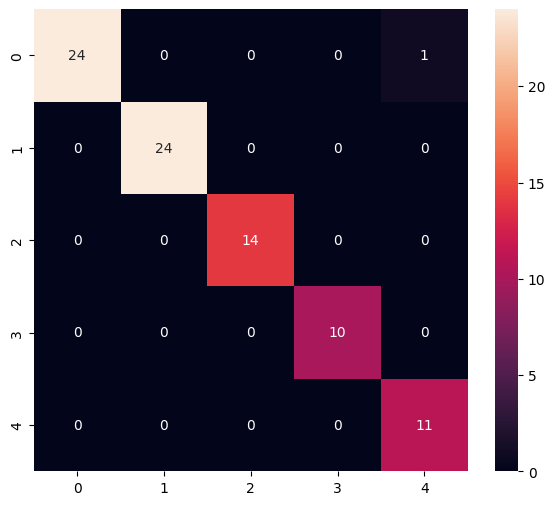

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10
           4       0.92      1.00      0.96        11

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

D:\GodotProjects\tddd57-labs\hand-gesture-recognition-mediapipe\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Albin\AppData\Local\Temp\tmp60whvgpr\assets


INFO:tensorflow:Assets written to: C:\Users\Albin\AppData\Local\Temp\tmp60whvgpr\assets


6588

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.1498653e-01 3.5009548e-04 1.4027457e-03 1.3640254e-02 6.6962028e-01]
4
